In [1]:
import zipfile
import shapely.geometry as shpg
import salem
import numpy as np
import pandas as pd
import geopandas as gpd
import glob
import matplotlib.pyplot as plt

In [2]:
files = glob.glob('thickness/*/*.tif')

In [3]:
files

['thickness/RGI-13-15/THICKNESS_RGI-13-15.7_2022February10.tif',
 'thickness/RGI-13-15/THICKNESS_RGI-13-15.14_2022February10.tif',
 'thickness/RGI-13-15/ERRTHICKNESS_RGI-13-15.2_2022February10.tif',
 'thickness/RGI-13-15/ERRTHICKNESS_RGI-13-15.9_2022February10.tif',
 'thickness/RGI-13-15/THICKNESS_RGI-13-15.13_2022February10.tif',
 'thickness/RGI-13-15/ERRTHICKNESS_RGI-13-15.12_2022February10.tif',
 'thickness/RGI-13-15/ERRTHICKNESS_RGI-13-15.5_2022February10.tif',
 'thickness/RGI-13-15/THICKNESS_RGI-13-15.5_2022February10.tif',
 'thickness/RGI-13-15/THICKNESS_RGI-13-15.9_2022February10.tif',
 'thickness/RGI-13-15/THICKNESS_RGI-13-15.11_2022February10.tif',
 'thickness/RGI-13-15/THICKNESS_RGI-13-15.2_2022February10.tif',
 'thickness/RGI-13-15/ERRTHICKNESS_RGI-13-15.10_2022February10.tif',
 'thickness/RGI-13-15/ERRTHICKNESS_RGI-13-15.7_2022February10.tif',
 'thickness/RGI-13-15/THICKNESS_RGI-13-15.3_2022February10.tif',
 'thickness/RGI-13-15/THICKNESS_RGI-13-15.10_2022February10.tif',
 

In [4]:
gdf = gpd.GeoDataFrame()

# First round for the main file
for i, f in enumerate(files):
    if '/THICKNESS_' in f:
        rgi_reg = int(f.split('/')[1].split('-')[1])
        gdf.loc[i, 'rgi_reg'] = f'{rgi_reg:02d}'
        gdf.loc[i, 'file_id'] = f.split('THICKNESS_')[1].replace('.tif', '')
        gdf.loc[i, 'thickness'] = f
        
gdf = gdf.sort_values(by=['rgi_reg', 'thickness'])
gdf = gdf.reset_index(drop=True)

# Second round for all the others
for i, f in enumerate(files):
    if '/THICKNESS_' in f:
        continue
    sel = gdf.loc[[fid in f for fid in gdf['file_id']]]
    assert len(sel) == 1
    gdf.loc[sel.index, 'err'] = f

gdf

rgi_reg              file_id  \
0       01   RGI-1.1_2021July01   
1       01   RGI-1.2_2021July01   
2       01   RGI-1.3_2021July01   
3       01   RGI-1.4_2021July08   
4       01   RGI-1.5_2021July01   
..     ...                  ...   
57      19  RGI-19.1_2021July09   
58      19  RGI-19.2_2021July09   
59      19  RGI-19.3_2021July09   
60      19  RGI-19.4_2021July09   
61      19  RGI-19.5_2021July09   

                                            thickness  \
0    thickness/RGI-1/THICKNESS_RGI-1.1_2021July01.tif   
1    thickness/RGI-1/THICKNESS_RGI-1.2_2021July01.tif   
2    thickness/RGI-1/THICKNESS_RGI-1.3_2021July01.tif   
3    thickness/RGI-1/THICKNESS_RGI-1.4_2021July08.tif   
4    thickness/RGI-1/THICKNESS_RGI-1.5_2021July01.tif   
..                                                ...   
57  thickness/RGI-19/THICKNESS_RGI-19.1_2021July09...   
58  thickness/RGI-19/THICKNESS_RGI-19.2_2021July09...   
59  thickness/RGI-19/THICKNESS_RGI-19.3_2021July09...   
60  thickness/RGI-19/THICKNESS_RGI-19.4_2021July09...   
61  thickness/RGI-19/THICKNESS_RGI-19.5_2021July09...   

                                                  err  
0   thickness/RGI-1/ERRTHICKNESS_RGI-1.1_2021July0...  
1   thickness/RGI-1/ERRTHICKNESS_RGI-1.2_2021July0...  
2   thickness/RGI-1/ERRTHICKNESS_RGI-1.3_2021July0...  
3   thickness/RGI-1/ERRTHICKNESS_RGI-1.4_2021July0...  
4   thickness/RGI-1/ERRTHICKNESS_RGI-1.5_2021July0...  
..                                                ...  
57  thickness/RGI-19/ERRTHICKNESS_RGI-19.1_2021Jul...  
58  thickness/RGI-19/ERRTHICKNESS_RGI-19.2_2021Jul...  
59  thickness/RGI-19/ERRTHICKNESS_RGI-19.3_2021Jul...  
60  thickness/RGI-19/ERRTHICKNESS_RGI-19.4_2021Jul...  
61  thickness/RGI-19/ERRTHICKNESS_RGI-19.5_2021Jul...  

[62 rows x 4 columns]

In [5]:
for i, s in gdf.iterrows():
    dd = salem.GeoTiff(s['thickness'])
    gdf.loc[i, 'geometry'] = dd.grid.extent_as_polygon(salem.wgs84)

In [6]:
gdf.crs = salem.wgs84.crs.to_wkt()

In [7]:
# for reg in gdf.rgi_reg.unique():
#     print(reg)
#     print(gdf.loc[gdf.rgi_reg == reg][['file_id']])
#     print('---------------------------------------------')

In [8]:
# remove duplicate file
gdf = gdf.loc[~gdf.file_id.isin(['RGI-17.7_2021July23'])]
gdf = gdf.reset_index(drop=True)

In [9]:
gdf

rgi_reg              file_id  \
0       01   RGI-1.1_2021July01   
1       01   RGI-1.2_2021July01   
2       01   RGI-1.3_2021July01   
3       01   RGI-1.4_2021July08   
4       01   RGI-1.5_2021July01   
..     ...                  ...   
56      19  RGI-19.1_2021July09   
57      19  RGI-19.2_2021July09   
58      19  RGI-19.3_2021July09   
59      19  RGI-19.4_2021July09   
60      19  RGI-19.5_2021July09   

                                            thickness  \
0    thickness/RGI-1/THICKNESS_RGI-1.1_2021July01.tif   
1    thickness/RGI-1/THICKNESS_RGI-1.2_2021July01.tif   
2    thickness/RGI-1/THICKNESS_RGI-1.3_2021July01.tif   
3    thickness/RGI-1/THICKNESS_RGI-1.4_2021July08.tif   
4    thickness/RGI-1/THICKNESS_RGI-1.5_2021July01.tif   
..                                                ...   
56  thickness/RGI-19/THICKNESS_RGI-19.1_2021July09...   
57  thickness/RGI-19/THICKNESS_RGI-19.2_2021July09...   
58  thickness/RGI-19/THICKNESS_RGI-19.3_2021July09...   
59  thickness/RGI-19/THICKNESS_RGI-19.4_2021July09...   
60  thickness/RGI-19/THICKNESS_RGI-19.5_2021July09...   

                                                  err  \
0   thickness/RGI-1/ERRTHICKNESS_RGI-1.1_2021July0...   
1   thickness/RGI-1/ERRTHICKNESS_RGI-1.2_2021July0...   
2   thickness/RGI-1/ERRTHICKNESS_RGI-1.3_2021July0...   
3   thickness/RGI-1/ERRTHICKNESS_RGI-1.4_2021July0...   
4   thickness/RGI-1/ERRTHICKNESS_RGI-1.5_2021July0...   
..                                                ...   
56  thickness/RGI-19/ERRTHICKNESS_RGI-19.1_2021Jul...   
57  thickness/RGI-19/ERRTHICKNESS_RGI-19.2_2021Jul...   
58  thickness/RGI-19/ERRTHICKNESS_RGI-19.3_2021Jul...   
59  thickness/RGI-19/ERRTHICKNESS_RGI-19.4_2021Jul...   
60  thickness/RGI-19/ERRTHICKNESS_RGI-19.5_2021Jul...   

                                             geometry  
0   POLYGON ((-155.21725 63.25339, -155.21628 63.2...  
1   POLYGON ((-167.27902 55.62410, -167.27822 55.6...  
2   POLYGON ((-160.52884 60.45355, -160.52793 60.4...  
3   POLYGON ((-156.64318 68.20145, -156.64202 68.2...  
4   POLYGON ((-149.06528 69.27784, -149.06403 69.2...  
..                                                ...  
56  POLYGON ((-37.96839 -54.01246, -37.96763 -54.0...  
57  POLYGON ((68.78110 -49.03347, 68.78179 -49.033...  
58  POLYGON ((73.25417 -52.98885, 73.25491 -52.988...  
59  POLYGON ((-46.12427 -60.47823, -46.12336 -60.4...  
60  POLYGON ((-56.51195 -62.81183, -56.51102 -62.8...  

[61 rows x 5 columns]

In [12]:
import zipfile
import tarfile

def open_zip_shapefile(fpath, exclude_pattern='', include_pattern=''):
    with zipfile.ZipFile(fpath, "r") as z:
        for f in z.filelist:
            if f.filename.endswith('.shp'):
                if exclude_pattern and exclude_pattern in f.filename:
                    continue
                if include_pattern and include_pattern not in f.filename:
                    continue
                fname = f.filename
                
    return gpd.read_file('zip://' + fpath + '/' + fname)

# This could be made lazy to speed up imports
data_dir = '/home/www/fmaussion/misc/rgi7_data'

maps = {}
fpath = f'{data_dir}/l0_support_data/ne_10m_coastline.zip'
maps['coast_hr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_50m_coastline.zip'
maps['coast_mr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_110m_coastline.zip'
maps['coast_lr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_10m_admin_0_countries.zip'
maps['countries_hr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_50m_admin_0_countries.zip'
maps['countries_mr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_110m_admin_0_countries.zip'
maps['countries_lr'] = open_zip_shapefile(fpath)

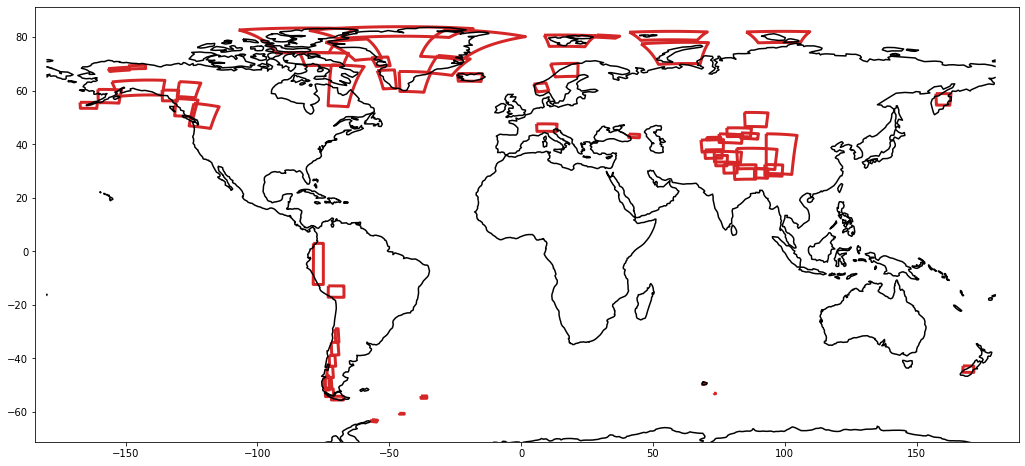

In [13]:
f, ax = plt.subplots(figsize=(18, 8))

gdf.plot(ax=ax, facecolor='none', edgecolor='C3', linewidth=3);
    
ax.autoscale(enable=False, axis='both', tight=True)
maps[f'coast_lr'].plot(ax=ax, facecolor='none', edgecolor='k', aspect=None);

# Alternative solution for "Polygon handles not passing to legend"
# ax.legend(handles=handles, loc=loc);
# if title is None:
#     title = f'RGI{reg:02d}'
# ax.set_title(title)

# if aspect is not None:
#     ax.set_aspect(aspect)

# if savefig:
#     plot_dir = data_dir + f'/l3_rgi7a_plots/RGI{reg:02d}'
#     mkdir(plot_dir)
#     plotname = 'isrgi6_map' if is_rgi6 else 'inventory_map'
#     plt.savefig(plot_dir + f'/{plotname}.png', bbox_inches='tight', dpi=150)

In [14]:
out_dir = 'millan22_thickness_lookup_shp_20220902'
gdf.to_file(out_dir)
import shutil
shutil.make_archive(f'{out_dir}', 'zip', out_dir)
shutil.rmtree(out_dir)

/home/users/fmaussion/.miniconda3/envs/oggm_env_fromlist/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [18]:
import shapely.geometry as shpg
p = shpg.Point(-150, 60)
gdf.contains(p)

0      True
1     False
2     False
3     False
4     False
      ...  
56    False
57    False
58    False
59    False
60    False
Length: 61, dtype: bool

## Check grids:

In [33]:
for i, s in gdf.iterrows():
    g1 = salem.GeoTiff(s['thickness']).grid
    g2 = salem.GeoTiff(s['err']).grid
    
    if g1.nx != g2.nx or g1.ny != g2.ny:
        print(s.file_id + ' has a different grid size for thickness and error')
        continue
    
    if g1.x0 != g2.x0 or g1.y0 != g2.y0:
        print(s.file_id + ' has different coordinates for thickness and error')
        continue
    
    if g1.dx != g2.dx or g1.dy != g2.dy:
        print(s.file_id + ' has different grid resolution for thickness and error')
        continue

RGI-1.1_2021July01 has a different grid size for thickness and error
RGI-5.1_2022February24 has different coordinates for thickness and error
RGI-5.5_2022February24 has a different grid size for thickness and error
RGI-10.1_2021July09 has different coordinates for thickness and error
